In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('Titanic-Dataset.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Here we have *891* rows (0 to 890) along with *12* columns with no null values so we can proceed to next step.<br>

1. Build a model that predicts whether a passenger on the Titanic survived or not.
2. Dataset contains information about individual passengers, such as their age, gender, ticket class, fare, cabin, and whether or not they survived.

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
# Cheecking what percentage column contain missing values
df.isnull().sum().sort_values(ascending=False)*100/len(df)

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64

In [9]:
# Since Cabin Column has more than 75 % null values .So , we will drop this column
df.drop(columns = 'Cabin', axis = 1, inplace = True)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [30]:

# Filling Null Values in Age column with mean values of age column
df['Age'] = df['Age'].fillna(df['Age'].mean())

# filling null values in Embarked Column with mode values of embarked column
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [12]:
# dropping some columns
df.drop(columns=['PassengerId','Name','Ticket'],axis=1,inplace=True)
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [31]:
# converting categorical Columns

df.replace({'Sex': {'male': 0, 'female': 1}, 'Embarked': {'S': 0, 'C': 1, 'Q': 2}}, inplace=True)

Survived
0    549
1    342
Name: count, dtype: int64


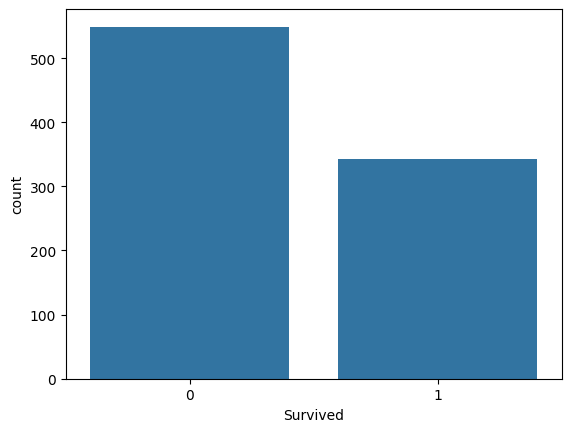

In [13]:
# Plotting CountPlot for Survived Column
print(df['Survived'].value_counts())
sns.countplot(x=df['Survived'])
plt.show()

## Prediction

In [14]:
# importing libraries

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [20]:
#Selecting the independent and dependent Features
cols = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
x = df[cols]
y = df['Survived']
print(x.shape)
print(y.shape)
print(type(x))  # DataFrame
print(type(y))  # Series

(891, 7)
(891,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.10,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(801, 7)
(90, 7)
(801,)
(90,)


In [22]:
#Creating Functions to compute Confusion Matrix, Classification Report and to generate Training and the Testing Score(Accuracy)


def cls_eval(ytest,ypred):
    cm = confusion_matrix(ytest,ypred)
    print('Confusion Matrix\n',cm)
    print('Classification Report\n',classification_report(ytest,ypred))

def mscore(model):
    print('Training Score',model.score(x_train,y_train))  # Training Accuracy
    print('Testing Score',model.score(x_test,y_test))     # Testing Accuracy

In [23]:
# Building the RandomForest Classifier Model
rfc=RandomForestClassifier(n_estimators=80,criterion='entropy',min_samples_split=5,max_depth=10)
rfc.fit(x_train,y_train)
# Computing Training and Testing score
mscore(rfc)
# Generating Prediction
ypred_rfc = rfc.predict(x_test)
print(ypred_rfc)

# Evaluate the model - confusion matrix, classification Report, Accuracy score
cls_eval(y_test,ypred_rfc)
acc_rfc = accuracy_score(y_test,ypred_rfc)
print('Accuracy Score',acc_rfc)

Training Score 0.916354556803995
Testing Score 0.7666666666666667
[1 0 1 1 1 0 0 1 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 1
 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1]
Confusion Matrix
 [[47  6]
 [15 22]]
Classification Report
               precision    recall  f1-score   support

           0       0.76      0.89      0.82        53
           1       0.79      0.59      0.68        37

    accuracy                           0.77        90
   macro avg       0.77      0.74      0.75        90
weighted avg       0.77      0.77      0.76        90

Accuracy Score 0.7666666666666667


In [24]:
# Building the DecisionTree Classifier Model
dt = DecisionTreeClassifier(max_depth=5,criterion='entropy',min_samples_split=10)
dt.fit(x_train, y_train)
# Computing Training and Testing score
mscore(dt)
# Generating Prediction
ypred_dt = dt.predict(x_test)
print(ypred_dt)
# Evaluate the model - confusion matrix, classification Report, Accuracy score
cls_eval(y_test,ypred_dt)
acc_dt = accuracy_score(y_test,ypred_dt)
print('Accuracy Score',acc_dt)

Training Score 0.8551810237203495
Testing Score 0.7777777777777778
[1 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1
 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1]
Confusion Matrix
 [[46  7]
 [13 24]]
Classification Report
               precision    recall  f1-score   support

           0       0.78      0.87      0.82        53
           1       0.77      0.65      0.71        37

    accuracy                           0.78        90
   macro avg       0.78      0.76      0.76        90
weighted avg       0.78      0.78      0.77        90

Accuracy Score 0.7777777777777778


### we got higher accuracy for *Decision Tree* 

In [25]:
#creating data frame

models = pd.DataFrame({
    'Model': ['Random Forest Classifier','Decision Tree Classifier'],
    'Score': [acc_rfc,acc_dt,]})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
1,Decision Tree Classifier,0.777778
0,Random Forest Classifier,0.766667


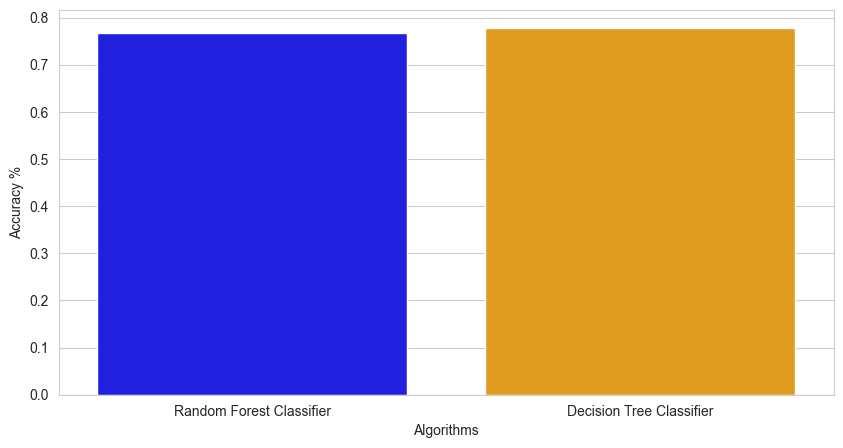

In [29]:
colors = ["blue","orange"]

sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=models['Model'], y=models['Score'], hue=models['Model'], palette=colors, legend=False)
plt.show()